# Class 5: Data Transformations, Grouped Data, and Data Visualization

## Last class

- read in a csv file to `pandas`
- select rows and columns from a `pandas.DataFrame`
- rename columns of a `pandas.DataFrame`

## This class

- Transformations: create a new column in a `pandas.DataFrame`
- Data summaries: mean, median, and measures of variation
- Data visualization: boxplots, histograms, and bar charts

## Midterm Information

- Covers all the content we have covered up until this class.

- 2022's test is available on the course website.

- The test was designed to be completed in 90 minutes.

- The teaching team will post a link to the test by 09:00 AM, Feb. 13 on the course website.

- You can submit anytime up until 11:00 AM on February 13.

- The instructors will be available on a [zoom link](https://utoronto.zoom.us/j/86707766870) in case you have any questions from 09:00 AM - 11:00 AM. We will also be in the classroom, SS2117 for those who would like to use the space and in-person support.

- If you have received an accommodation and are writing the test with Accommodated Testing Services, you will receive a separate link from them when you start your test.

## Data Transformations

- Time in the time use survey is measured in minutes, but it's not easy to interpret when the numbers get very large.

> _I worked four thousand six hundred thirty two minutes last week!_

- It would be easier if time was reported in hours.

> _I worked over seventy seven hours last week!_

- Converting time measured in minutes to time measured in hours is an example of a **data transformation**.


## Time use survey

In [1]:
import pandas as pd

time_use_data = pd.read_csv('gss_tu2016_main_file.csv')

time_use_data.head()

/var/folders/0j/ybsv4ncn5w50v40vdh5jjlww0000gn/T/ipykernel_57351/4017176398.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


,CASEID,pumfid,wght_per,survmnth,wtbs_001,agecxryg,agegr10,agehsdyc,ageprgrd,chh0014c,...,ree_02,ree_03,rlr_110,lan_01,lanhome,lanhmult,lanmt,lanmtmul,incg1,hhincg1
0,10000,10000,616.6740,7,305.1159,96,5,62,96,0,...,1,1,1,1,1,1,1,1,1,1
1,10001,10001,8516.6140,7,0.0000,6,5,32,5,0,...,5,6,3,1,5,2,5,2,5,8
2,10002,10002,371.7520,1,362.7057,2,4,9,10,3,...,5,1,1,1,1,1,1,1,3,8
3,10003,10003,1019.3135,3,0.0000,96,6,65,96,0,...,3,2,2,1,1,1,1,1,2,2
4,10004,10004,1916.0708,9,11388.9706,96,2,25,96,0,...,9,99,9,9,99,9,99,9,2,4


## Subset the data

In this class we will explore some of these columns, so let's create a subset of `time_use_data` with only the following columns:

_(columns from last week)_
   + `CASEID`: participant ID 
   + `luc_rst`: large urban centre vs rural and small towns
   + `chh0014c`: number of kids 14 or under
   + `gtu_110`: feeling rushed

_(plus...)_
   + `agegr10`: age group
   + `marstat`: marital status
   + `sex`: sex
   + `dur01`: duration spent sleeping
   + `dur08`: duration spent working 
   + `prv`: province of residence

In [2]:
important_columns = [
    "CASEID", "prv",
    "luc_rst", "agegr10", "marstat", "sex", "chh0014c",
    "gtu_110", "dur01", "dur08"
]

subset_time_use_data = time_use_data[important_columns]

subset_time_use_data.head()

,CASEID,prv,luc_rst,agegr10,marstat,sex,chh0014c,gtu_110,dur01,dur08
0,10000,46,1,5,5,1,0,1,510,0
1,10001,59,1,5,1,1,0,3,420,0
2,10002,47,1,4,1,2,3,1,570,480
3,10003,35,1,6,5,2,0,2,510,20
4,10004,35,1,2,6,1,0,1,525,0


## Rename columns so that they are meaningful

- Use the `rename` function to rename columns.

In [3]:
# dictionary of 'old name':'new name'

newnames = {
        'CASEID': 'Participant ID',
        'luc_rst': 'Urban/Rural',
        'agegr10': 'Age Group',
        'marstat': 'Marital Status',
        'sex': 'sex',
        'chh0014c': 'Kids under 14',
        'gtu_110': 'Feeling Rushed',
        'dur01': 'Sleep duration',
        'dur08': 'Work duration'
    }

subset_time_use_data_colnames = subset_time_use_data.rename(columns = newnames)

subset_time_use_data_colnames.head()

,Participant ID,prv,Urban/Rural,Age Group,Marital Status,sex,Kids under 14,Feeling Rushed,Sleep duration,Work duration
0,10000,46,1,5,5,1,0,1,510,0
1,10001,59,1,5,1,1,0,3,420,0
2,10002,47,1,4,1,2,3,1,570,480
3,10003,35,1,6,5,2,0,2,510,20
4,10004,35,1,2,6,1,0,1,525,0


## Create a new column in a pandas DataFrame

Create a new numeric column derived from another numeric column.

The code below creates a new column `Sleep duration (hours)` by dividing `Sleep duration` by 60, since 1 hour = 60 minutes.



In [4]:
subset_time_use_data_colnames['Sleep duration (hours)'] = subset_time_use_data_colnames['Sleep duration'] / 60

subset_time_use_data_colnames.head()

,Participant ID,prv,Urban/Rural,Age Group,Marital Status,sex,Kids under 14,Feeling Rushed,Sleep duration,Work duration,Sleep duration (hours)
0,10000,46,1,5,5,1,0,1,510,0,8.50
1,10001,59,1,5,1,1,0,3,420,0,7.00
2,10002,47,1,4,1,2,3,1,570,480,9.50
3,10003,35,1,6,5,2,0,2,510,20,8.50
4,10004,35,1,2,6,1,0,1,525,0,8.75


## What happened?

To create a new column, use the `[]` brackets with the new column name at the left side of the assignment.

The calculation of the values is done **element-wise**. This means all values in the given column are divided by the value 60 at once. You do not need to use a loop to iterate each of the rows!


![][def]

Reference is available [here](https://pandas.pydata.org/docs/getting_started/intro_tutorials/05_add_columns.html).

[def]: images/min-to-hr.png

## Transform a column using if-then

- The `Age Group` column has the following distribution.

In [5]:
subset_time_use_data_colnames['Age Group'].value_counts()

Age Group
5    3741
6    2958
4    2789
3    2597
2    2127
7    1875
1    1303
Name: count, dtype: int64

It would be easier to interpret if the labels were used.

               Age group of respondent (groups of 10)

           VALUE  LABEL
               1  15 to 24 years
               2  25 to 34 years
               3  35 to 44 years
               4  45 to 54 years
               5  55 to 64 years
               6  65 to 74 years
               7  75 years and over
              96  Valid skip
              97  Don't know
              98  Refusal
              99  Not stated

           Data type: numeric
           Missing-data codes: 96-99
           Record/column: 1/35

In [6]:
# make a copy of the dataframe
subset_time_df = subset_time_use_data_colnames.copy()

# create a new column called 'Age group label'

subset_time_df.loc[subset_time_df['Age Group'] == 1, 'Age group label'] = '15-24'

subset_time_df.loc[subset_time_df['Age Group'] == 2, 'Age group label'] = '25-34'

subset_time_df.loc[subset_time_df['Age Group'] == 3, 'Age group label'] = '35-44'

subset_time_df.loc[subset_time_df['Age Group'] == 4, 'Age group label'] = '45-54'

subset_time_df.loc[subset_time_df['Age Group'] == 5, 'Age group label'] = '55-64'

subset_time_df.loc[subset_time_df['Age Group'] == 6, 'Age group label'] = '65-74'

subset_time_df.loc[subset_time_df['Age Group'] == 7, 'Age group label'] = '75+'

subset_time_df.head()

,Participant ID,prv,Urban/Rural,Age Group,Marital Status,sex,Kids under 14,Feeling Rushed,Sleep duration,Work duration,Sleep duration (hours),Age group label
0,10000,46,1,5,5,1,0,1,510,0,8.50,55-64
1,10001,59,1,5,1,1,0,3,420,0,7.00,55-64
2,10002,47,1,4,1,2,3,1,570,480,9.50,45-54
3,10003,35,1,6,5,2,0,2,510,20,8.50,65-74
4,10004,35,1,2,6,1,0,1,525,0,8.75,25-34


## What happened?

![][def]

[def]: images/age-group.png

## To create a new column in a pandas DataFrame using if-then/if-then-else logic 

This line 

`subset_time_df.loc[subset_time_df['Age Group'] == 1, 'Age group label'] = '15-24'` 

creates a new column in `subset_time_df` called `Age group label` according to the *if-then (conditional)* logic:

**If** `subset_time_df['Age Group'] == 1` **then**  `Age group label` is assigned the value `15-24`.
  
This line 

`subset_time_df.loc[subset_time_df['Age Group'] == 2, 'Age group label'] = '25-34'`

does the *else if* logic.  Namely,

**If** `subset_time_df['Age Group'] == 2` **then**  `Age group label` is assigned the value `25-34`.
    
This line 

`subset_time_df.loc[subset_time_df['Age Group'] == 3, 'Age group label'] = '35-44'`

does the *else if* logic. Namely,

**If** `subset_time_df['Age Group'] == 3` **then**  `Age group label` is assigned the value `35-44`. 

etc ...

See [idioms in the Pandas cookbook](https://pandas.pydata.org/docs/user_guide/cookbook.html#idioms) and [a reference on different ways to subset a pandas DataFrame](https://pandas.pydata.org/pandas-docs/version/1.0/getting_started/intro_tutorials/03_subset_data.html).

## Merging pandas DataFrames

- We want would like to look at the relationship between sleeping and working, on different aspects of time use at the provincial level.  In addition we would like to add provincial level data of on income and housing.

- The data is in `provincial_data.csv`.

In [7]:
prov_data = pd.read_csv('provincial_data.csv')
prov_data

,COL0,COL1,COL2,COL3,COL4
0,1,60.2,70336.0,2.4,16.6
1,10,49.5,67272.0,2.3,10.6
2,11,58.2,61163.0,2.3,11.1
3,12,55.2,60764.0,2.3,12.0
4,13,54.6,59347.0,2.3,10.3
5,24,59.5,59822.0,2.3,12.9
6,35,59.9,74287.0,2.6,19.8
7,46,61.7,68147.0,2.5,11.4
8,47,63.5,75412.0,2.5,12.1
9,48,65.4,93835.0,2.6,15.1



```
COL0 - GEO UID
COL1 - Labour - Total Sex / Employment rate
COL2 - Income - Total Sex / Total - Income statistics in 2015 for private households by household size - 100% data / Median total income of households in 2015 ($)
COL3 - Dwelling characteristics / Average household size

COL4 - Housing - Total Sex / Total - Owner households in non-farm, non-reserve private dwellings - 25% sample data / % of owner households spending 30% or more of its income on shelter costs
```

Let's give the columns meaningful names.

In [9]:
colnames = {'COL0':'Prov', 
            'COL1':'Employment Rate', 
            'COL2':'Income',
            'COL3': 'Household Size',
            'COL4': 'Pct house over 30'}

prov_data.rename(columns = colnames, inplace=True)
prov_data

,Prov,Employment Rate,Income,Household Size,Pct house over 30
0,1,60.2,70336.0,2.4,16.6
1,10,49.5,67272.0,2.3,10.6
2,11,58.2,61163.0,2.3,11.1
3,12,55.2,60764.0,2.3,12.0
4,13,54.6,59347.0,2.3,10.3
5,24,59.5,59822.0,2.3,12.9
6,35,59.9,74287.0,2.6,19.8
7,46,61.7,68147.0,2.5,11.4
8,47,63.5,75412.0,2.5,12.1
9,48,65.4,93835.0,2.6,15.1


Now, we are ready to use the `merge` function in `pandas`. 

In [11]:
prov_data_df = subset_time_df.merge(
    prov_data, 
    right_on = 'Prov', # the right data frame is prov_data 
    left_on = 'prv'    # the left data frame is subset_time_df
)   


prov_data_df.head()

,Participant ID,prv,Urban/Rural,Age Group,Marital Status,sex,Kids under 14,Feeling Rushed,Sleep duration,Work duration,Sleep duration (hours),Age group label,Prov,Employment Rate,Income,Household Size,Pct house over 30
0,10000,46,1,5,5,1,0,1,510,0,8.50,55-64,46,61.7,68147.0,2.5,11.4
1,10001,59,1,5,1,1,0,3,420,0,7.00,55-64,59,59.6,69995.0,2.4,20.7
2,10002,47,1,4,1,2,3,1,570,480,9.50,45-54,47,63.5,75412.0,2.5,12.1
3,10003,35,1,6,5,2,0,2,510,20,8.50,65-74,35,59.9,74287.0,2.6,19.8
4,10004,35,1,2,6,1,0,1,525,0,8.75,25-34,35,59.9,74287.0,2.6,19.8


Create a new column `Prov label` that **recodes** `Prov` by it's label in the code book.

In [12]:
prov_data_df.loc[prov_data_df['Prov'] == 10, 'Prov label'] = 'NL'

prov_data_df.loc[prov_data_df['Prov'] == 11, 'Prov label'] = 'Prince Edward Island'

prov_data_df.loc[prov_data_df['Prov'] == 12, 'Prov label'] = 'Nova Scotia'

prov_data_df.loc[prov_data_df['Prov'] == 13, 'Prov label'] = 'New Brunswick'

prov_data_df.loc[prov_data_df['Prov'] == 24, 'Prov label'] = 'Quebec'

prov_data_df.loc[prov_data_df['Prov'] == 35, 'Prov label'] = 'Ontario'

prov_data_df.loc[prov_data_df['Prov'] == 46, 'Prov label'] = 'Manitoba'

prov_data_df.loc[prov_data_df['Prov'] == 47, 'Prov label'] = 'Saskatchewan'

prov_data_df.loc[prov_data_df['Prov'] == 48, 'Prov label'] = 'Alberta'

prov_data_df.loc[prov_data_df['Prov'] == 59, 'Prov label'] = 'British Columbia'

prov_data_df.loc[prov_data_df['Prov'] >= 96, 'Prov label'] = None

prov_data_df.head()

,Participant ID,prv,Urban/Rural,Age Group,Marital Status,sex,Kids under 14,Feeling Rushed,Sleep duration,Work duration,Sleep duration (hours),Age group label,Prov,Employment Rate,Income,Household Size,Pct house over 30,Prov label
0,10000,46,1,5,5,1,0,1,510,0,8.50,55-64,46,61.7,68147.0,2.5,11.4,Manitoba
1,10001,59,1,5,1,1,0,3,420,0,7.00,55-64,59,59.6,69995.0,2.4,20.7,British Columbia
2,10002,47,1,4,1,2,3,1,570,480,9.50,45-54,47,63.5,75412.0,2.5,12.1,Saskatchewan
3,10003,35,1,6,5,2,0,2,510,20,8.50,65-74,35,59.9,74287.0,2.6,19.8,Ontario
4,10004,35,1,2,6,1,0,1,525,0,8.75,25-34,35,59.9,74287.0,2.6,19.8,Ontario


## Is time spent resting different by province?

### Grouped summaries of data 

- Many times we will want to calculate means, proportions, and other statistics by group membership.

- This is so common that `pandas` has a built-in function called `groupby` that groups a data frame by another variable.

In [13]:
prov_data_df.head()

,Participant ID,prv,Urban/Rural,Age Group,Marital Status,sex,Kids under 14,Feeling Rushed,Sleep duration,Work duration,Sleep duration (hours),Age group label,Prov,Employment Rate,Income,Household Size,Pct house over 30,Prov label
0,10000,46,1,5,5,1,0,1,510,0,8.50,55-64,46,61.7,68147.0,2.5,11.4,Manitoba
1,10001,59,1,5,1,1,0,3,420,0,7.00,55-64,59,59.6,69995.0,2.4,20.7,British Columbia
2,10002,47,1,4,1,2,3,1,570,480,9.50,45-54,47,63.5,75412.0,2.5,12.1,Saskatchewan
3,10003,35,1,6,5,2,0,2,510,20,8.50,65-74,35,59.9,74287.0,2.6,19.8,Ontario
4,10004,35,1,2,6,1,0,1,525,0,8.75,25-34,35,59.9,74287.0,2.6,19.8,Ontario


In [14]:
grouped_by_prov = prov_data_df.groupby('Prov') #group the dataframe by prov

type(grouped_by_prov)

pandas.core.groupby.generic.DataFrameGroupBy

In [15]:
rest_by_prov_mean = grouped_by_prov['Sleep duration (hours)'].mean()

rest_by_prov_mean

Prov
10    8.651739
11    8.901090
12    8.500917
13    8.722338
24    8.759245
35    8.612381
46    8.829857
47    8.824515
48    8.710498
59    8.808136
Name: Sleep duration (hours), dtype: float64

`rest_by_prov_mean` is a pandas Series with indexed by `Prov`.

In [16]:
type(rest_by_prov_mean)

pandas.core.series.Series

## DataFrame Index

In [17]:
rest_by_prov_mean.index

Index([10, 11, 12, 13, 24, 35, 46, 47, 48, 59], dtype='int64', name='Prov')

From the 

```
  prv                Province of residence

           VALUE  LABEL
              10  Newfoundland and Labroador
              11  Prince Edward Island
              12  Nova Scotia
              13  New Brunswick
              24  Quebec
              35  Ontario
              46  Manitoba
              47  Saskatchewan
              48  Alberta
              59  British Columbia
              96  Valid skip
              97  Don't know
              98  Refusal
              99  Not stated

           Data type: numeric
           Missing-data codes: 96-99
           Record/columns: 1/57-58

```

We can reindex `rest_by_prov_mean`.

In [18]:
index_new = [
    'Newfoundland and Labrador', 
    'Prince Edward Island', 
    'Nova Scotia', 
    'New Brunswick',
    'Quebec',
    'Ontario', 
    'Manitoba',
    'Saskatchewan', 
    'Alberta',
    'British Columbia'
]

rest_by_prov_mean.index = index_new

rest_by_prov_mean

Newfoundland and Labrador    8.651739
Prince Edward Island         8.901090
Nova Scotia                  8.500917
New Brunswick                8.722338
Quebec                       8.759245
Ontario                      8.612381
Manitoba                     8.829857
Saskatchewan                 8.824515
Alberta                      8.710498
British Columbia             8.808136
Name: Sleep duration (hours), dtype: float64

## Summing across rows of a DataFrame

How much time is spent by each respondent sleeping and working?

The average time spent sleeping and working by province is:

In [19]:
restwork_by_prov_mean = grouped_by_prov[['Sleep duration', 'Work duration']].mean()

restwork_by_prov_mean

,Sleep duration,Work duration
Prov,,
10,519.104339,133.946281
11,534.065385,134.126923
12,510.055019,158.398649
13,523.340265,148.428166
24,525.554724,159.450461
35,516.742869,177.705566
46,529.791411,175.156442
47,529.470905,182.572198
48,522.629888,199.491620


## Two different ways to calulate row totals

> There are more but we will focus on the two methods.

We would like to calculate the total mean time spent sleeping and working.

In [20]:
restwork_by_prov_mean['Total1'] = restwork_by_prov_mean['Sleep duration'] + restwork_by_prov_mean['Work duration']

restwork_by_prov_mean.head()


,Sleep duration,Work duration,Total1
Prov,,,
10,519.104339,133.946281,653.050620
11,534.065385,134.126923,668.192308
12,510.055019,158.398649,668.453668
13,523.340265,148.428166,671.768431
24,525.554724,159.450461,685.005184


In [22]:
restwork_by_prov_mean['Total2'] = restwork_by_prov_mean[['Sleep duration','Work duration']].sum(
    axis = 1 # sum across all columns
)

restwork_by_prov_mean.head()

,Sleep duration,Work duration,Total1,Total2
Prov,,,,
10,519.104339,133.946281,653.050620,653.050620
11,534.065385,134.126923,668.192308,668.192308
12,510.055019,158.398649,668.453668,668.453668
13,523.340265,148.428166,671.768431,671.768431
24,525.554724,159.450461,685.005184,685.005184


- In pandas `axis = 1` refers to columns and `axis = 0` refers to rows.
- `DataFrame.sum(axis = 1)`: sum across columns 
- `DataFrame.sum(axis = 0)`: sum across rows.

## Statistical Variables


- A **categorical variable** is a variable for which the measurement scale consists of a set of categories.  For example, time use has ten categories or **levels**.  These types of variables are very common in social and biomedical sciences, and many other areas. 

- Categorical variables that don't have a natural ordering is called a **nominal variable**. 
> e.g. names

- If a categorical variable has a natural ordering it is called an **ordinal variable**.  For example, if **levels** `96` (valid skip), `97` (Don't know), `98` (Refusal), `99` (Not stated) are removed from `gtu_110` then time use would be considered an ordinal variable since it's ordered from feeling rushed `Every day` (`1`) to feeling rushed `Never` (`6`). 

- **Ordinal variables** clearly order categories, but the "distance" between categories are unknown. A person categorized as feeling rushed `About once a week` feels more rushed than someone who feels rushed `About once a month`, although we cannot give a numnerical value for how much more rushed that person is.

- An **interval variable** is one that does have numerical distances between any two levels of the measurement scale.  For example, age measured in years is an interval variable.

- Time use is an example of an **interval (statistical) variable**.

## What's the difference between a Statistical Variable and a Variable in python?

- A variable in python is a location in computer memory to store a value.

- A statistical variable is essentially a mathematical representation of data.

## Examples of implementing statistical variables in python

If 10 people are *randomly* selected, and asked how many minutes they slept last night, then this data could be represented by an **interval variable**.
   + In python the data could be represented in `pandas.Series`, where the `Series` data type is float.

If 10 people are *randomly* selected, and asked if they live in urban or rural areas, then this data could be represented by an **categorical variable**.
   + In python the data could be represented in `pandas.Series`, where the `Series` data type is Boolean (`True` if urban, and `False` if not urban).




## Statistical Distributions

- What is a statistical distribution?

- How can a distribution be summarized?

- What questions can we answer using a distribution? 

## What is the distribution of kids under 14 in Ontario?

1. Select rows in `prov_data_df` where `Prov label` is `Ontario`

2. Select the column `Kids under 14`

3. Compute the number of respondents who have 0 kids, 1 kid, etc. using `.value_counts()`

In [25]:
Ontkidsdist = prov_data_df.loc[
    prov_data_df['Prov label'] == 'Ontario',
    'Kids under 14'
].value_counts()

Ontkidsdist

Kids under 14
0    3918
1     508
2     430
3     157
Name: count, dtype: int64

In [26]:
print(type(Ontkidsdist))

<class 'pandas.core.series.Series'>


### A bar plot of the distribution of kids under 14 in Ontario

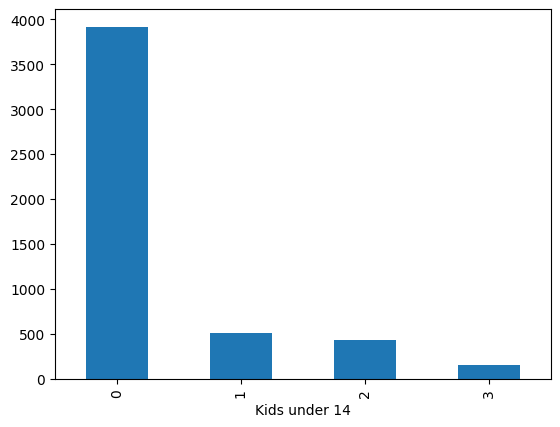

In [44]:
Ontkidsdist.plot.bar();

If we want to plot proportions instead of counts then we can transform `Ontkidsdist` by dividing by the total number of observations.

In [41]:
Ontkidsdist_prop = Ontkidsdist / Ontkidsdist.sum()
Ontkidsdist_prop

Kids under 14
0    0.781568
1    0.101337
2    0.085777
3    0.031319
Name: count, dtype: float64

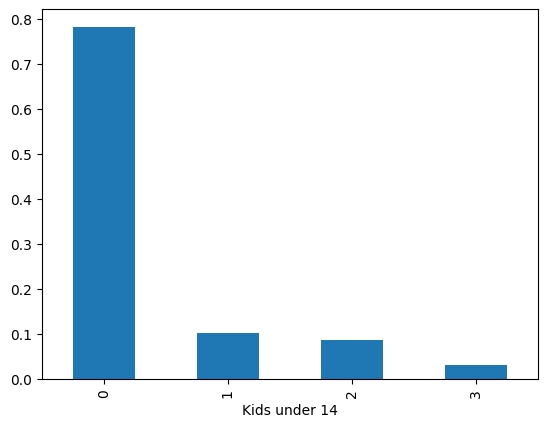

In [42]:
Ontkidsdist_prop.plot.bar();

Distribution of counts by province

In [45]:
prov_data_df.groupby(['Prov label'])['Kids under 14'].value_counts()

Prov label            Kids under 14
Alberta               0                1077
                      1                 152
                      2                 145
                      3                  58
British Columbia      0                1672
                      1                 145
                      2                 132
                      3                  36
Manitoba              0                 763
                      1                  93
                      2                  88
                      3                  34
NL                    0                 766
                      1                 103
                      2                  84
                      3                  15
New Brunswick         0                 875
                      2                  79
                      1                  77
                      3                  27
Nova Scotia           0                 858
                      2                 

## Summarizing the distribution of an interval variable

`dur01` is time spent sleeping, resting, etc. 

```
dur01              Duration - Sleeping, resting, relaxing, sick in bed

           VALUE  LABEL
               0  No time spent doing this activity
            9996  Valid skip
            9997  Don't know
            9998  Refusal
            9999  Not stated

           Data type: numeric
           Missing-data codes: 9996-9999
           Record/columns: 1/65-68
```

In [46]:
Sleepduration = prov_data_df['Sleep duration (hours)']

print(type(Sleepduration))

Sleepduration.dtypes

<class 'pandas.core.series.Series'>


dtype('float64')

In [47]:
Sleepduration.describe()

count    17390.000000
mean         8.706552
std          2.217733
min          0.000000
25%          7.500000
50%          8.500000
75%          9.750000
max         24.000000
Name: Sleep duration (hours), dtype: float64

The distribution of an interval variable are often described as:

- a measure of centre such as mean, median, mode

- a measure of spread such as standard deviation, inter-quartile range

- a measure of range such as the largest value minus the smallest value (or max - min)

## Quantiles

- The median value is the 50% quantile.  50% of the values fall below this value.  The median is also called the second quartile.

- The 25% quantile is the value where 25% of the values fall below.  This is often the first quartile (Q1)  

- The 75% quantile is the value where 75% of the values fall below.  This is often the third quartile (Q3)

- There are 17390 values.  If we sort sleep duration values from largest to smallest then find the value in the middle (17390 / 2 = 8695) then that value is the median.

## Variation

- One of the most important concepts in statistical reasoning.

- Standard deviation is average deviation from the mean.  **Large** values mean large variation and **small** values mean small variation.   

- Small samples often have large variation, so estimating a statistic from a small sample is usually less reliable.

## Question

A certain town is served by two hospitals. In the larger hospital about 45 babies are born each day, and in the smaller hospital about 15 babies are born each day. As you know, about 50% of all babies are boys. However, the exact percentage varies from day to day. Sometimes it may be higher than 50%, sometimes lower.


For a period of 1 year, each hospital recorded the days on which more than 60% of the babies born were boys. Which hospital do you think recorded more such days?

- The larger hospital
- The smaller hospital
- About the same (that is, within 5% of each other) 

## Histograms

Histograms display the frequency distribution of an interval variable.



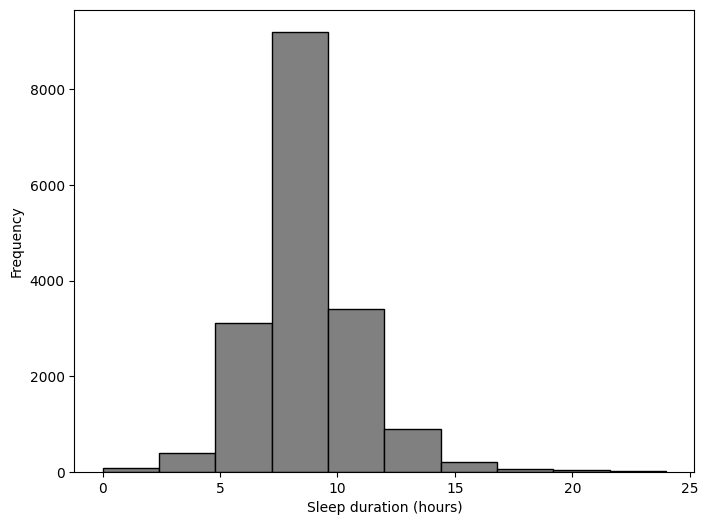

In [48]:
Sleepduration_hist =  Sleepduration.plot.hist(
    bins=10, 
    edgecolor='black', 
    color='grey', 
    figsize = (8, 6)
);

Sleepduration_hist.set_xlabel('Sleep duration (hours)');

In [49]:
pd.cut(Sleepduration, bins=10)

0          (7.2, 9.6]
1          (4.8, 7.2]
2          (7.2, 9.6]
3          (7.2, 9.6]
4          (7.2, 9.6]
             ...     
17385      (7.2, 9.6]
17386     (9.6, 12.0]
17387      (7.2, 9.6]
17388    (12.0, 14.4]
17389      (7.2, 9.6]
Name: Sleep duration (hours), Length: 17390, dtype: category
Categories (10, interval[float64, right]): [(-0.024, 2.4] < (2.4, 4.8] < (4.8, 7.2] < (7.2, 9.6] ... (14.4, 16.8] < (16.8, 19.2] < (19.2, 21.6] < (21.6, 24.0]]

## Boxplots 

- Another way to visualize the distribution of an interval variable

- A box plot is a method for graphically depicting groups of numerical data through their quartiles. 
- The box extends from the Q1 to Q3 quartile values of the data, with a line at the median (Q2). 
- The whiskers extend from the edges of box to show the range of the data. 
- By default, they extend no more than 1.5 * IQR (IQR = Q3 - Q1) from the edges of the box, ending at the farthest data point within that interval. Outliers are plotted as separate dots.

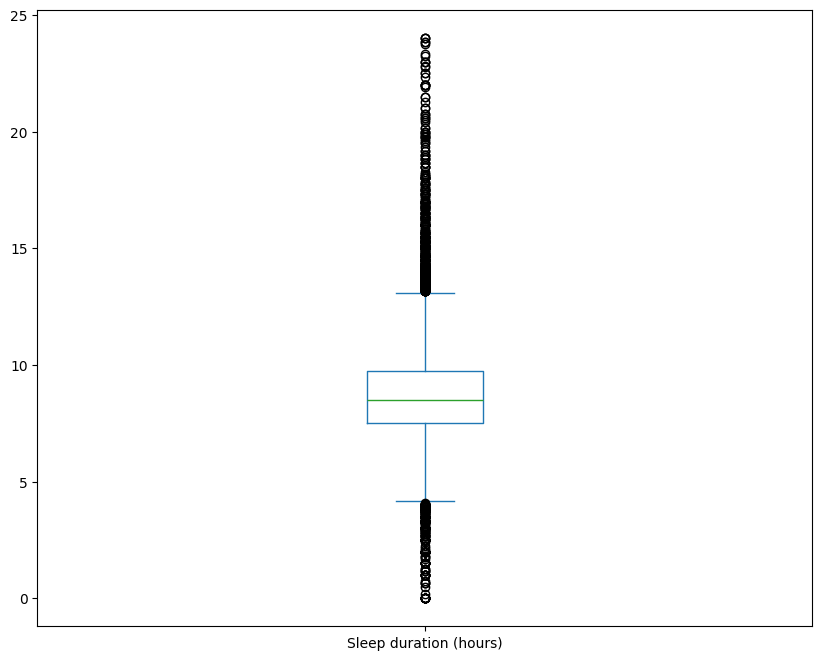

In [50]:
Sleepduration_boxplot = Sleepduration.plot.box(figsize = (10,8));

Sleepduration_boxplot;

## Anatomy of a Boxplot

![](images/boxplot_anatomy.png)

Two pandas methods to create a boxplot are:

1. `pandas.DataFrame.plot.box`: plot a Series or columns of a DataFrame
   
2. `pandas.DataFrame.boxplot`: plot the columns of a DataFrame with easy to use syntax for boxplots by a group.



Boxplots are helpful for comparing the distributions between groups.

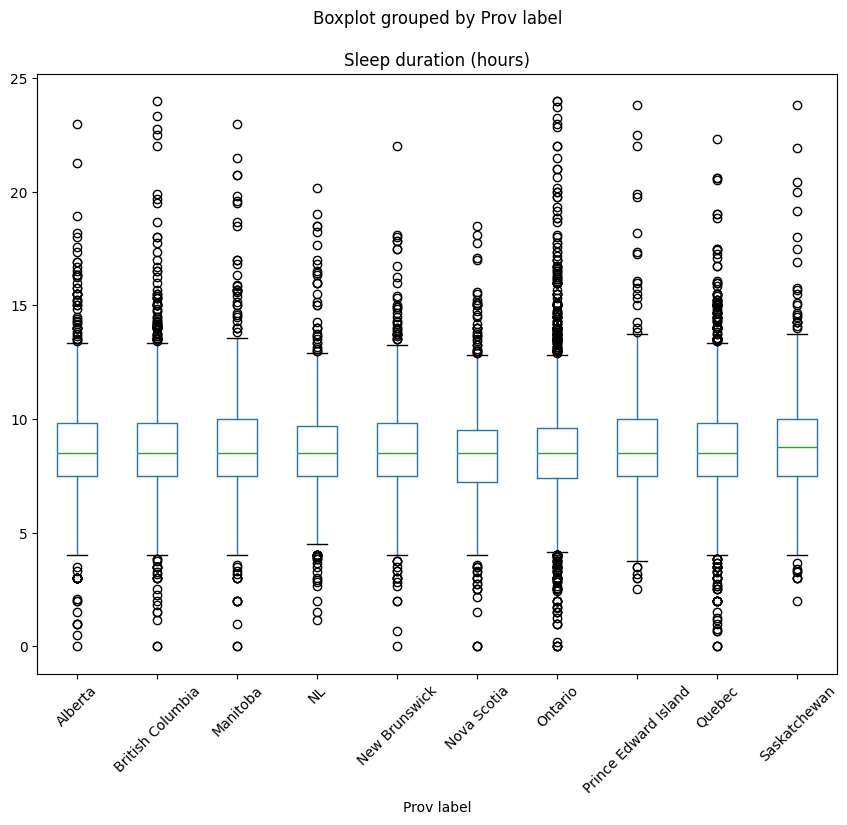

In [39]:
Sleephours_boxplot = prov_data_df.boxplot(
    column='Sleep duration (hours)', 
    by='Prov label', 
    figsize = (10,8),
    rot = 45, 
    grid = False
);

Sleephours_boxplot;

Compare the distribution of `Sleep duration` and `Work duration` by specifying the `column` parameter of `DataFrame.boxplot` as a list.

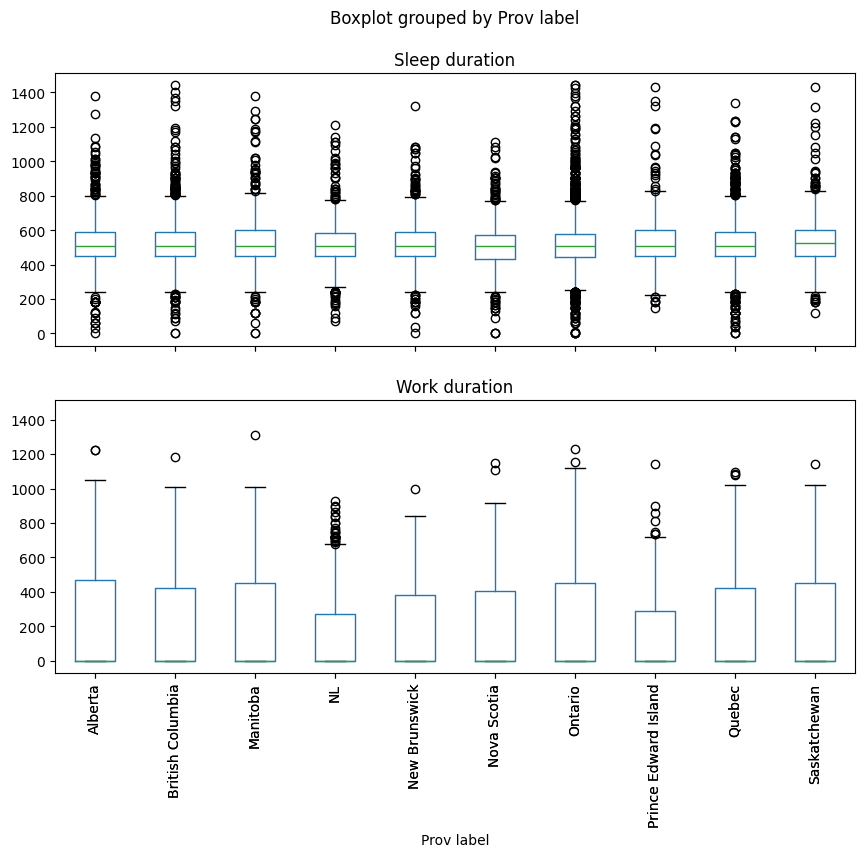

In [53]:
Sleepwork_boxplot = prov_data_df.boxplot(
    column = ['Sleep duration', 'Work duration'], 
    by = 'Prov label', 
    figsize = (10,8), 
    rot = 90, 
    grid = False, 
    layout = (2,1)
);

Sleepwork_boxplot;

To further customize the look of your plots, see the [documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.boxplot.html).

In [79]:
prov_data_df['Prov label'].unique()

array(['Manitoba', 'British Columbia', 'Saskatchewan', 'Ontario',
       'Quebec', 'Prince Edward Island', 'Alberta', 'Nova Scotia',
       'New Brunswick', 'NL'], dtype=object)

<class 'matplotlib.axes._axes.Axes'>


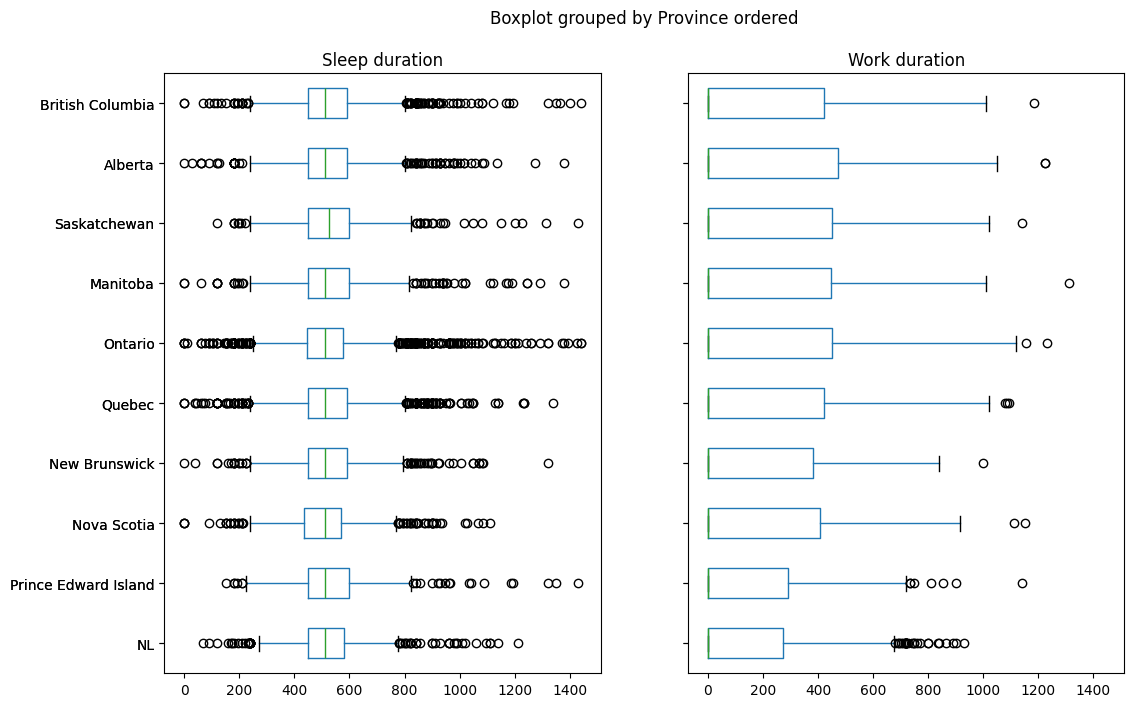

In [86]:
prov_data_df['Province ordered'] = pd.Categorical(
    prov_data_df['Prov label'], categories = [
        'NL', 
        'Prince Edward Island', 
        'Nova Scotia', 
        'New Brunswick',
        'Quebec',
        'Ontario', 
        'Manitoba',
        'Saskatchewan', 
        'Alberta',
        'British Columbia'
    ],
    ordered = True
)
Sleepwork_boxplot = prov_data_df.boxplot(
    column = ['Sleep duration', 'Work duration'], 
    by = 'Province ordered', 
    figsize = (12,8), 
    rot = 0, 
    grid = False, 
    layout = (1,2),
    vert = False
);
print(type(Sleepwork_boxplot[0]));
Sleepwork_boxplot[0].set_ylabel(None);
Sleepwork_boxplot;
